In [1]:
import numpy as np
import pandas as pd
import matplotlib as pl
import seaborn as sns
import warnings

In [2]:
data=pd.read_csv("D:/Data/cetpa_ml/regression.csv")
data.head()

,Age,Job Type,Marital Status,Education,Metro City,Signed in since(Days),Purchase made
0,28.0,Unemployed,No,Graduate,No,32,261.4689
1,57.0,Retired,Yes,Graduate,Yes,31,273.9025
2,27.0,Student,Yes,Graduate,Yes,31,275.8921
3,23.0,Unemployed,Yes,Secondry,Yes,34,295.1524
4,23.0,Employed,Yes,Graduate,Yes,42,325.0809


In [6]:
data.shape

(325, 7)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    312 non-null    float64
 1   Job Type               325 non-null    object 
 2   Marital Status         325 non-null    object 
 3   Education              325 non-null    object 
 4   Metro City             325 non-null    object 
 5   Signed in since(Days)  325 non-null    int64  
 6   Purchase made          325 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 17.9+ KB


In [8]:
data.describe()

,Age,Signed in since(Days),Purchase made
count,312.000000,325.000000,325.00000
mean,38.349359,79.476923,7525.62652
std,8.267808,17.273676,3770.51836
min,23.000000,31.000000,261.46890
25%,32.000000,73.000000,5138.02240
50%,38.000000,84.000000,7624.78240
75%,44.000000,92.000000,9854.53290
max,65.000000,108.000000,17355.42760


In [9]:
data.isnull().sum()

Age                      13
Job Type                  0
Marital Status            0
Education                 0
Metro City                0
Signed in since(Days)     0
Purchase made             0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
import matplotlib as pl

<AxesSubplot:ylabel='Frequency'>

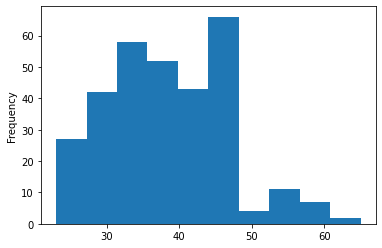

In [11]:
data['Age'].plot.hist()

In [12]:
data['Age'].median()

38.0

In [13]:
data['Age'].fillna(data['Age'].median(),inplace=True)

In [14]:
data.isnull().sum()

Age                      0
Job Type                 0
Marital Status           0
Education                0
Metro City               0
Signed in since(Days)    0
Purchase made            0
dtype: int64

In [20]:
dum_jt=pd.get_dummies(data['Job Type'],drop_first=True)
dum_jt.head()

,Retired,Student,Unemployed
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,0,0


In [21]:
dum_ms=pd.get_dummies(data['Marital Status'],drop_first=True)
dum_ms.head()

,Yes
0,0
1,1
2,1
3,1
4,1


In [22]:
dum_mc=pd.get_dummies(data['Metro City'])
dum_mc.head()

,No,Yes
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [24]:
dum_mc.pop('Yes')
dum_mc.head()

,No
0,1
1,0
2,0
3,0
4,0


In [25]:
mrt_city=dum_mc
mrt_city.head()

,No
0,1
1,0
2,0
3,0
4,0


In [27]:
dum_ed=pd.get_dummies(data['Education'],drop_first=True)
dum_ed.head()

,Primary,Secondry
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0


In [29]:
pre_final_data=pd.concat([data,dum_jt,dum_ms,mrt_city,dum_ed],axis=1)
pre_final_data.head()

,Age,Job Type,Marital Status,Education,Metro City,Signed in since(Days),Purchase made,Retired,Student,Unemployed,Yes,No,Primary,Secondry
0,28.0,Unemployed,No,Graduate,No,32,261.4689,0,0,1,0,1,0,0
1,57.0,Retired,Yes,Graduate,Yes,31,273.9025,1,0,0,1,0,0,0
2,27.0,Student,Yes,Graduate,Yes,31,275.8921,0,1,0,1,0,0,0
3,23.0,Unemployed,Yes,Secondry,Yes,34,295.1524,0,0,1,1,0,0,1
4,23.0,Employed,Yes,Graduate,Yes,42,325.0809,0,0,0,1,0,0,0


In [31]:
final_data=pre_final_data.drop(['Job Type','Marital Status','Metro City','Education'],axis=1)
final_data.head()

,Age,Signed in since(Days),Purchase made,Retired,Student,Unemployed,Yes,No,Primary,Secondry
0,28.0,32,261.4689,0,0,1,0,1,0,0
1,57.0,31,273.9025,1,0,0,1,0,0,0
2,27.0,31,275.8921,0,1,0,1,0,0,0
3,23.0,34,295.1524,0,0,1,1,0,0,1
4,23.0,42,325.0809,0,0,0,1,0,0,0


In [35]:
x = final_data[['Age','Primary','Secondry','No','Yes','Retired','Student','Unemployed','Signed in since(Days)']]
y = final_data['Purchase made']

In [36]:
print(x,y)

      Age  Primary  Secondry  No  Yes  Retired  Student  Unemployed  \
0    28.0        0         0   1    0        0        0           1   
1    57.0        0         0   0    1        1        0           0   
2    27.0        0         0   0    1        0        1           0   
3    23.0        0         1   0    1        0        0           1   
4    23.0        0         0   0    1        0        0           0   
..    ...      ...       ...  ..  ...      ...      ...         ...   
320  38.0        0         0   0    1        0        0           0   
321  44.0        0         0   0    1        0        0           0   
322  41.0        0         0   0    1        0        0           0   
323  41.0        0         0   0    1        0        0           0   
324  39.0        0         0   0    0        0        0           0   

     Signed in since(Days)  
0                       32  
1                       31  
2                       31  
3                       34  
4 

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [40]:
lr.fit(x_train,y_train)

LinearRegression()

In [41]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [43]:
lr.coef_

array([   33.1103898 , -1766.6050817 , -1320.54573782, -1140.03460679,
        -451.51469411,  -548.98080784,   698.01986142,  -486.57054944,
         176.41369082])

In [44]:
pred  = lr.predict(x_test)

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

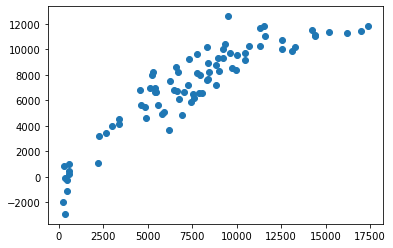

In [45]:
plt.scatter(y_test,pred)
plt.xlable('Y Test')
plt.ylable('Predicted Y')

In [47]:
print("Accuracy of Model is ",lr.score(x_test,y_test))
y_test_pred

Accuracy of Model is  0.7965103332038209


array([ 6632.19795291, 12601.74168394,  8326.66049817, 10220.41944007,
        4828.89218684,  5632.36187024,  8384.60251902, 11664.19549949,
         825.99653091,  3704.18926235,  9234.43118352,  4125.53169551,
       10066.25439722,  6556.10818401,  9315.98364542,  -116.01959401,
        4508.31669747,  7197.05832772, 11069.25881174, 11101.84403725,
        8765.13778191,   427.64246141,  6716.68863287,  6164.42246813,
        5089.96478402,  6615.06310233,  8610.44757477,  8555.6137013 ,
        9900.70244824,  -253.21634512, 10220.41944007,  9203.96396128,
       11829.74744847,  7993.26223906,  6606.49572164,  5614.75952063,
        9735.67566355,  7200.65596506, 10286.64021966,  9613.45198929,
       -1160.08075593,  1115.42265839,  9288.91962105, 11862.85783827,
        4599.72434308,  3191.86839986,  6936.29801098,  6136.06727026,
        4944.19889544, 10451.66700436, 11477.56392374,  6672.71650124,
        8240.3430453 , 11356.50927068, 11301.15023293,  7694.49228656,
      

In [49]:
print("Coefficients: \n",lr.coef_)

Coefficients: 
 [   33.1103898  -1766.6050817  -1320.54573782 -1140.03460679
  -451.51469411  -548.98080784   698.01986142  -486.57054944
   176.41369082]


In [50]:
from sklearn import metrics

In [55]:
print("Mean Absolute Error",metrics.mean_absolute_error(y_test, pred))
print("Mean Squared Error", metrics.mean_squared_error(y_test, pred))
print("Root Mean Squared Error", np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error 1395.8535123094273
Mean Squared Error 3404342.471765618
Root Mean Squared Error 1845.0860337029321


In [56]:
coefficient = pd.DataFrame(lr.coef_,x.columns)
coefficient.columns = ["Coefficient"]
coefficient

,Coefficient
Age,33.110390
Primary,-1766.605082
Secondry,-1320.545738
No,-1140.034607
Yes,-451.514694
Retired,-548.980808
Student,698.019861
Unemployed,-486.570549
Signed in since(Days),176.413691
